In [1]:
from SupportVectorClassifier import SupportVectorClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
sns.set_style("darkgrid")

In [2]:
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=2.5, random_state=40
)

In [25]:
# put an outlier to show the effect of choosing the parameter C
idx = np.argmax(X[:,1])
y[idx] = 0

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

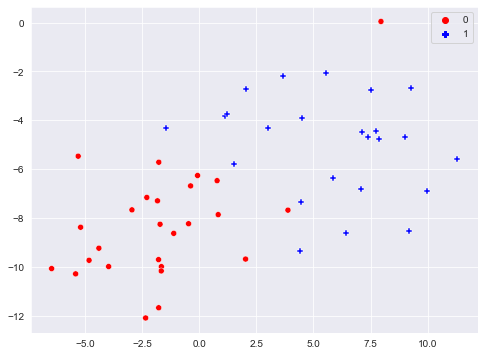

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

In [37]:
svc = SupportVectorClassifier(C=1000,kernel_function=None,epsilon=1e-7)

In [38]:
svc.fit(X,y)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -12417.740635328199
            Iterations: 103
            Function evaluations: 5255
            Gradient evaluations: 103


In [39]:
preds = svc.predict(X)
print("Accuracy:",accuracy_score(preds,np.where(y <= 0,0,1)))

Accuracy: 0.52


In [40]:
## w1*x1 + w2*x2 + b = 0 (general form)
## x2 = -(w1 / w2)*x1 - b/w2
def plot_hyperplane(w, b):
    slope = -w[0] / w[1]
    
    x1_coord = np.array(plt.gca().get_xlim()) # get the range of x1 values
    x2_coord = slope * x1_coord - (b / w[1])
    plt.plot(x1_coord, x2_coord, '--', color='black')

## w1*x1 + w2*x2 + b = 1 (positive sample) => x2 = 1 / w2 -b / w2 - (w1 / w2)*x1   
## w1*x1 + w2*x2 + b = -1 (negative sample) => x2 = -1 / w2 -b / w2 - (w1 / w2)*x1  
def plot_margin(w, b):
    slope = -w[0] / w[1]
    
    x1_coord = np.array(plt.gca().get_xlim())
    x2_positive_samples = 1/w[1] - (b / w[1]) + slope * x1_coord
    plt.plot(x1_coord, x2_positive_samples, color='blue') 
    
    x2_negative_samples = -1/w[1] - (b / w[1]) + slope * x1_coord
    plt.plot(x1_coord, x2_negative_samples,color='red')

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


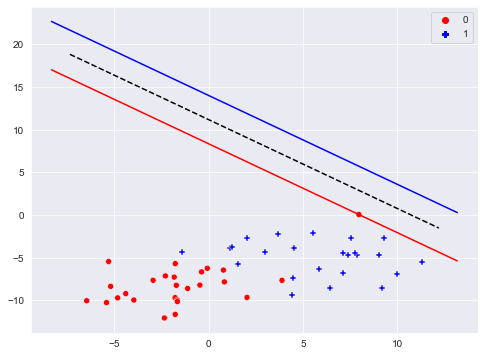

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)
plot_hyperplane(svc.w,svc.b)
plot_margin(svc.w,svc.b)

<h3> Kernel Functions for Non Linear Data </h3>

In [145]:
centers = [[-2,2],[-2,-2],[2,-2],[2,2]]
X_nl, y_nl = datasets.make_blobs(n_samples = 100, n_features=2, centers=centers, cluster_std=0.8, random_state=40)

In [146]:
y_nl = np.where((y_nl == 0) | (y_nl == 2),0,1) # convert it to binary classification

In [147]:
xnl_train,xnl_test,ynl_train,ynl_test = train_test_split(X_nl,y_nl,test_size=0.2)

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

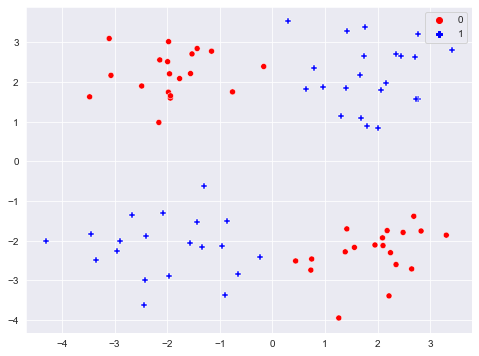

In [148]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(xnl_train[:,0], xnl_train[:, 1],style=ynl_train,hue=ynl_train,markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

In [46]:
def gaussian_kernel(x1, x2, gamma=0.1):
    diff = x1 - x2
    return np.exp(-np.sqrt(diff.dot(diff)) / (2*gamma**2))

In [150]:
kernel_svc = KernelSupportVectorClassifier(kernel_function=gaussian_kernel,gamma=2)

In [151]:
kernel_svc.fit(xnl_train,ynl_train)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.778060768649635
            Iterations: 12
            Function evaluations: 975
            Gradient evaluations: 12


In [152]:
train_preds = kernel_svc.predict(xnl_train)
test_preds = kernel_svc.predict(xnl_test)
print("Training Accuracy :",accuracy_score(train_preds,ynl_train))
print("Test Accuracy :",accuracy_score(test_preds,ynl_test))

Training Accuracy : 1.0
Test Accuracy : 0.95


How to draw decision boundary </br>
https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


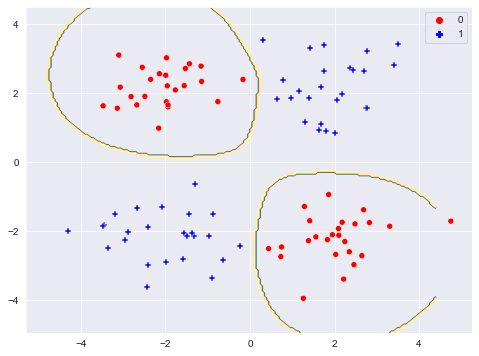

In [172]:
h = 0.05  # step size in the mesh
# create a mesh to plot in
x_min, x_max = xnl_train[:, 0].min() - 1, xnl_train[:, 0].max() + 1
y_min, y_max = xnl_train[:, 1].min() - 1, xnl_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = kernel_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X_nl[:,0], X_nl[:, 1], style=y_nl,hue=y_nl, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

<h3> Performance on the Real World Dataset </h3>

In [2]:
dataset = datasets.load_breast_cancer()

x = dataset.data
y = dataset.target

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [7]:
model = SupportVectorClassifier(C=1) # if we use linear svm (without using any kernels)

In [8]:
model.fit(x_train,y_train)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1836583.617705501
            Iterations: 14
            Function evaluations: 4623
            Gradient evaluations: 10


In [9]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

In [11]:
print("Training Accuracy :",accuracy_score(train_preds,y_train))
print("Test Accuracy :",accuracy_score(test_preds,y_test))

Training Accuracy : 0.44835164835164837
Test Accuracy : 0.43859649122807015


We can observe the overfitting effect of gamma parameter on the gaussian kernel

In [47]:
gamma_parameters = [0.1,1,10]

In [48]:
for g in gamma_parameters:
    complex_model = SupportVectorClassifier(C=1,kernel_function=gaussian_kernel,gamma=g)
    
    complex_model.fit(x_train,y_train)
    
    train_preds = complex_model.predict(x_train)
    test_preds = complex_model.predict(x_test)
    
    print(f"Gamma = {g}; Training Accuracy :",accuracy_score(train_preds,y_train))
    print(f"Gamma = {g}; Test Accuracy :",accuracy_score(test_preds,y_test))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -203.56818181808546
            Iterations: 2
            Function evaluations: 912
            Gradient evaluations: 2
Gamma = 0.1; Training Accuracy : 1.0
Gamma = 0.1; Test Accuracy : 0.6228070175438597
Optimization terminated successfully    (Exit mode 0)
            Current function value: -202.65316003458707
            Iterations: 5
            Function evaluations: 2280
            Gradient evaluations: 5
Gamma = 1; Training Accuracy : 1.0
Gamma = 1; Test Accuracy : 0.6228070175438597
Optimization terminated successfully    (Exit mode 0)
            Current function value: -68.25365223048433
            Iterations: 43
            Function evaluations: 19617
            Gradient evaluations: 43
Gamma = 10; Training Accuracy : 0.9340659340659341
Gamma = 10; Test Accuracy : 0.9649122807017544
